<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_Atenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Atenas

O [Airbnb](https://www.airbnb.com.br/)  é um serviço online para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem, permitindo com que as pessoas alugem o todo ou parte de sua própria casa. 

Como diria em seu slogan, **"Um mundo perto de você"**, o site fornece uma ótima plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação, sendo uma forma simples e rápida para achar ou divulgar algum imóvel.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Atenas na Grécia, e ver insights que podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [1]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importar Arquivo
df = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2020-12-23/visualisations/listings.csv')


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
#Ver os cinco primeiros termos
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,77,1,25,2020-10-06,0.21,6,0
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,38,1,44,2020-12-10,0.44,6,72
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,32,1,54,2020-12-09,0.54,6,218
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,45,1,23,2020-10-03,0.18,6,318
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,39,1,17,2020-01-08,0.17,6,91


# Análise de Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados, além de possibilitar a inspiração da construção de insights.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


### **Q1. Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa. (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 9413
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em, aproximadamente, quase 23% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,03% e 0,09%, respectivamente, dos valores nulos.

In [5]:
#Visualizar se existem dados faltantes e, caso existam, a quantidade deles
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               9413
reviews_per_month                 2146
last_review                       2146
host_name                            9
name                                 3
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_id                              0
id                                   0
dtype: int64

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.227983
last_review                       0.227983
host_name                         0.000956
name                              0.000319
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, iremos plotar o histograma.

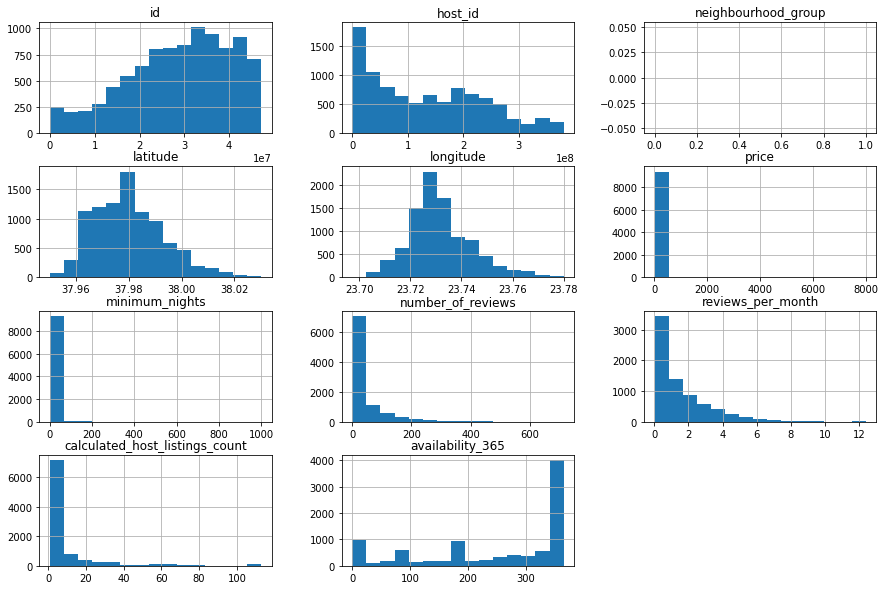

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# Ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9413.000000,9413.000000,9413.000000,7267.000000,9413.000000,9413.000000
mean,68.862424,3.739828,37.659407,1.519487,9.668437,248.108042
std,243.839933,18.842543,64.352952,1.646004,18.480472,127.660362
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,30.000000,1.000000,1.000000,0.300000,1.000000,165.000000
50%,45.000000,2.000000,9.000000,0.920000,2.000000,304.000000
75%,69.000000,2.000000,46.000000,2.200000,8.000000,362.000000
max,8000.000000,1000.000000,714.000000,12.410000,113.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 69, porém seu valor máximo é 8000.
* A quantidade mínima de noites (`minimum_nights`) está chegando até 1000 noites, o que são quase 3 anos.

# Boxplot para minimum_nights

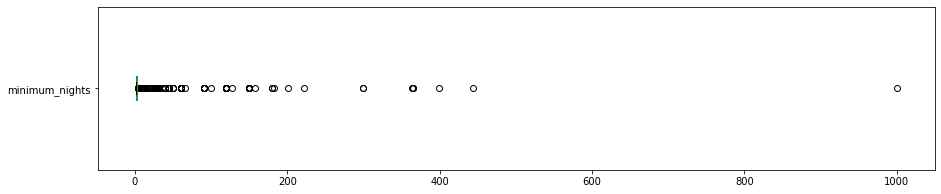

minimum_nights: valores acima de 10:
Entradas: 283
Porcentagem: 3.0065%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores acima de 10 dias para minimum_nights
print("minimum_nights: valores acima de 10:")
print("Entradas: {}".format(len(df[df.minimum_nights>10])))
print("Porcentagem: {:.4f}%".format((len(df[df.minimum_nights>10]) / df.shape[0])*100))

Ou seja, todos os valores fora do retângulo são Outliers. Temos 283 locais que tem estadia mínima de 10 dias, o que resulta em, aproximadamente, 3% da nossa base de dados.

OBS: A escolha de 10 dias foi para termos uma melhor qualidade de visualização dos nossos dados no Histograma sem Outliers!.

#Boxplot para price

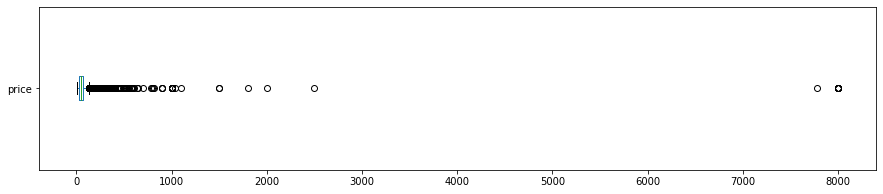


price: valores acima de 200
Entradas: 255
Porcentagem: 2.7090%


In [10]:
#price
df.price.plot(kind='box', vert=False, figsize = (15,3));
plt.show()

#Ver quantidade de valores acimda de 200 para price
print('\nprice: valores acima de 200')
print('Entradas: {}'.format(len(df[df.price>200])))
print('Porcentagem: {:.4f}%'.format(len(df[df.price>200])/df.shape[0]*100))

Ou seja, todos os valores fora do retângulo são Outliers. Temos 255 locais que tem valores acima de 200, o que resulta em, aproximadamente, 2.7% da nossa base de dados.

OBS: A escolha do valor 200 foi para termos uma melhor qualidade de visualização dos nossos dados no Histograma sem Outliers!.

#Boxplot para calculated_host_listings_count

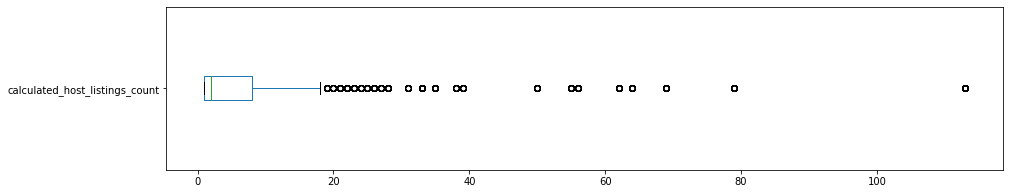


calculated_host_listings_count: pessoas que possuem 80 ou mais imóveis
Entradas: 113
Porcentagem: 1.2005%


In [11]:
#price
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize = (15,3));
plt.show()

#Ver quantidade de pessoas que possuem 80 ou mais imóveis
print('\ncalculated_host_listings_count: pessoas que possuem 80 ou mais imóveis')
print('Entradas: {}'.format(len(df[df.calculated_host_listings_count>80])))
print('Porcentagem: {:.4f}%'.format(len(df[df.calculated_host_listings_count>80])/df.shape[0]*100))

Ou seja, todos os valores fora do retângulo são Outliers. Temos 133 pessoas que possuem 80 ou mais imóveis, o que resulta em, aproximadamente, 1.2% da nossa base de dados.

OBS: A escolha do valor 80 foi para termos uma melhor qualidade de visualização dos nossos dados no Histograma sem Outliers!.

#Histograma sem *Outliers*!

Após identificarmos que existem Outliers nas variáveis `price` e `minimum_nights`, vamos agora removê-los para termos um histograma mais eficiente sobre os nossos dados.   

In [12]:
#Remover os *outliers* em um DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count>80].index, axis=0, inplace=True)

In [13]:
#Remover o atributo `neighbourhood_group`, pois esta vazio em todas as linhas
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

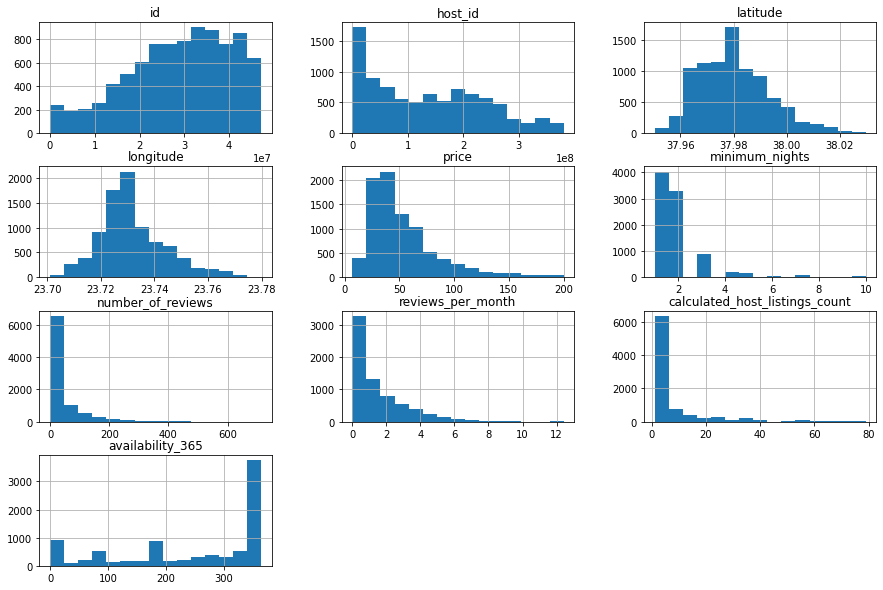

In [14]:
#Plotar o histograma para as Variáveis numéricas 
df_clean.hist(bins=15, figsize=(15,10));

Percebemos, então, que ao tirarmos alguns outliers conseguimos visualizar melhor como nossos dados estão distribuídos. Isto faz com que os insights tirados do histograma tenham uma probabilidade maior de compactuarem com a realidade do nosso problema!

In [15]:
df_clean.groupby('price').minimum_nights.mean().head(61)

price
7     2.000000
8     1.000000
9     1.500000
10    1.000000
11    1.083333
        ...   
63    1.700000
64    1.709677
65    1.818792
66    1.384615
67    1.708333
Name: minimum_nights, Length: 61, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre dois atributos.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
# Matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.075978,-0.126657,-0.130866,0.113771,0.070807
minimum_nights,-0.075978,1.000000,-0.065052,-0.158305,-0.145382,-0.075308
number_of_reviews,-0.126657,-0.065052,1.000000,0.808231,-0.008873,-0.023938
reviews_per_month,-0.130866,-0.158305,0.808231,1.000000,-0.000308,0.003735
calculated_host_listings_count,0.113771,-0.145382,-0.008873,-0.000308,1.000000,0.051778
availability_365,0.070807,-0.075308,-0.023938,0.003735,0.051778,1.000000


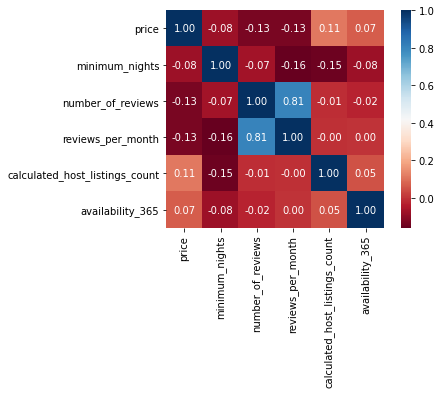

In [17]:
#Mapa de calor da correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Nesse caso, percebemos que 'number_of_reviews' e 'reviews_per_month' tem uma correlação forte, o que é um pouco óbvio, no entanto os outros atributos não tem muita correlação entre si.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7743
Private room        812
Hotel room          155
Shared room          59
Name: room_type, dtype: int64

In [19]:
#Mostrar a porcentagem de cada tipo de imóvel
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.882997
Private room       0.092599
Hotel room         0.017676
Shared room        0.006728
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Atenas?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros **'neighbourhoods'** a partir do preço de locação.

In [20]:
#Mostrar os 10 bairros que mais aparecem no airbnb
df_clean.neighbourhood.value_counts().head(10)  

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1591
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  771
ΝΕΟΣ ΚΟΣΜΟΣ                          661
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             636
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     557
ΠΑΓΚΡΑΤΙ                             399
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      387
ΚΟΛΩΝΑΚΙ                             302
ΑΜΠΕΛΟΚΗΠΟΙ                          285
ΑΚΡΟΠΟΛΗ                             280
Name: neighbourhood, dtype: int64

In [21]:
#Bairros com preço médio  mais caro
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
ΡΗΓΙΛΛΗΣ                  106.307692
ΛΥΚΑΒΗΤΤΟΣ                 70.060870
ΚΟΛΩΝΑΚΙ                   69.917219
ΑΚΡΟΠΟΛΗ                   66.957143
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ     65.135135
ΖΑΠΠΕΙΟ                    64.037879
ΙΛΙΣΙΑ                     60.286624
ΘΗΣΕΙΟ                     59.350943
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ        59.267185
ΚΕΡΑΜΕΙΚΟΣ                 55.713004
Name: price, dtype: float64

Acima, vemos que o bairro ΡΗΓΙΛΛΗΣ, está com a maior média de preço.

Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para ΡΗΓΙΛΛΗΣ.

In [22]:
# ver quantidade de imóveis no ΡΗΓΙΛΛΗΣ
print(df_clean[df_clean.neighbourhood == "ΡΗΓΙΛΛΗΣ"].shape)

# ver as entradas em ΡΗΓΙΛΛΗΣ
df_clean[df_clean.neighbourhood == "ΡΗΓΙΛΛΗΣ"]

(13, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
346,4627302,"Panathenaic Stadium 1min, Acropolis 20min.",23856407,Nitya,ΡΗΓΙΛΛΗΣ,37.97218,23.74212,Entire home/apt,32,6,18,2020-07-29,0.44,2,23
538,7572379,Central Kolonaki - Athenian Oasis.,39701255,Sissy,ΡΗΓΙΛΛΗΣ,37.97414,23.74165,Entire home/apt,180,2,57,2019-09-17,0.91,5,6
674,9536776,Kolonaki - Syntagma penthouse with sea view,33425468,Irini,ΡΗΓΙΛΛΗΣ,37.97414,23.74165,Entire home/apt,180,2,5,2018-04-02,0.08,5,7
713,10063292,Cosy apartment in Athens-next to Syntagma Square,39701255,Sissy,ΡΗΓΙΛΛΗΣ,37.97445,23.74114,Entire home/apt,170,2,19,2019-08-30,0.32,5,7
715,10064490,Luxury apartment Athens-next to Syntagma Square,33425468,Irini,ΡΗΓΙΛΛΗΣ,37.97414,23.74165,Entire home/apt,170,2,27,2018-09-12,0.46,5,8
979,12939021,Athens ancient olympic stadium apartment,54443805,Housefull,ΡΗΓΙΛΛΗΣ,37.97237,23.74222,Entire home/apt,69,5,16,2019-09-23,0.30,16,235
2016,19292810,"THE CACTI HOUSE, 75 m2, by the National Gardens",44817573,Alexandra,ΡΗΓΙΛΛΗΣ,37.97377,23.74132,Entire home/apt,45,2,32,2020-10-27,0.82,1,354
2147,19855179,Best Location Best View Top fl Apt in Athens,140402011,Lampros,ΡΗΓΙΛΛΗΣ,37.97251,23.74227,Entire home/apt,70,4,13,2019-07-28,0.32,1,298
2541,21926171,SOPHISTICATED PALACES AREA CITY CENTRE APARTMENT,159990595,Eugenia,ΡΗΓΙΛΛΗΣ,37.97335,23.74095,Entire home/apt,150,2,0,NaN,NaN,1,177
6151,35060931,An Elegant apartment next to Syntagma square,256671776,Eleni,ΡΗΓΙΛΛΗΣ,37.97509,23.74176,Entire home/apt,99,2,26,2020-10-24,1.40,1,319


Assim, temos que no bairro de ΡΗΓΙΛΛΗΣ, existem somente 13 imóveis enquanto em outros bairros, como ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ e ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ existem 1591 e 771, respectivamente.
Dessa forma, fica claro que, ao ver esses dados, é necessário um cuidado antes de fazermos os insights!

#Plotar os imóveis pela latitude-longitude

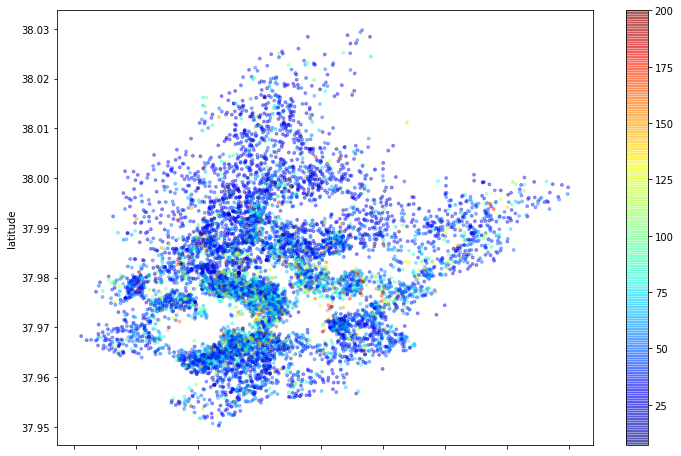

In [23]:
#Mapa
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#WordCloud dos termos e palavras mais usados pelos anfitriões do site!

Wordcloud (em português, nuvem de palavras) é um tipo de visualização de dados muito poderoso, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.
Resumidamente, o algoritmo conta a frequência com que cada palavra aparece no texto e, com essa frequência, você define tamanhos proporcionais às palavras. As maiores são as que apareceram mais no texto, e as menores são as que menos apareceram.
Dessa forma, a Wordcloud é útil para análises, é visualmente impactante, agregando valor a qualquer relatório ou notebook.

O *dataset* que eu escolhi foi o completo 'listings.csv.gz' do dia 23 /12/ 2020, pois estão contidos nele as propagandas dos anfitriões! .

Este *dataset* tem 25Mb po causa das suas 9413 entradas e 74 atributos! Vamos importar ele todo, mas só iremos usar a coluna `description`, que contém a "propaganda" do dono da casa.

##Importando os dados do Airbnb

In [24]:
#Para começar, instale a biblioteca `wordcloud` caso você não tenha.
!pip install wordcloud -q

In [25]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv("http://data.insideairbnb.com/greece/attica/athens/2020-12-23/data/listings.csv.gz")

In [26]:
#eliminar as colunas com valores ausentes
description = df.dropna(subset=['description'], axis=0)['description']

In [27]:
# exemplos de descrições para os imóveis no Airbnb
display(description.iloc[100])
display(description.iloc[120])

'<b>The space</b><br />The apartment is located in the oldest and most beautiful district of Athens, named Kypriadou. The building is old but well maintained and the apartment renovated 2 years ago and it\'s all new. It is 45sqm, with a bedroom, living room with large sofa bed, hallway, bathroom (with bath) and kitchen. The bed has a Media Strom mattresse worth 1.800 € and bought it a year ago. A year ago I bought the three-seater sofa sleeper. The house has a small balcony that fits but two chairs and small table.<br />Specifically, the home is located at the Sq Papadiamantis and is within 1 min walk from pharmacy, supermarkets, taverns and trolley lines 13, 14, 15 stops. Located 5 minutes walk are bars, taverns and pubs. Within 7 minutes walk is the KEP (public services centre for the citizens), the police station and the train station "Ano Patissia." Located equidistant pizzeria and pet shop. Within 10 minutes walk is Galatsiou Avenue and Patision Avenue where all banks and commerci

'<b>The space</b><br />The seventh floor apartment of Aleksandras Av. is for 3-4 persons. There are 2 single bedrooms and 1 semi-double bedroom, sharing a kitchen and a bathroom. Room 3 (semi-double bedroom) has a separate entrance. The floor plan of the apartment can be seen at the photos which are uploaded. There is air condition and ADSL connection available for every room and a washing machine available for common use just for the apartment. Different bus stations are situated in a distance of 100 to 200 meters serving several directions and with an excellent and frequent bus service. The closest metro station stands 1km away which can be reached either by foot or by bus. Concerning other facilities, in 150 meters there are two different big supermarkets, pharmacies, in 300 meters there are more than 5 different banks. The view from the apartment is quite spectacular. Famous Lycabettus hill, Strefi hill, Imittos mountain, sunset and the pretty park on the opposite site of Aleksandr

##Tratamento dos dados

Para conseguirmos criar uma nuvem de palavras, vamos precisar 
juntar todas as palavras em uma só frase. Dessa forma, vamos excluir as pontuações do texto e as ‘stopwords’ que são palavras como ('i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're") além de outras mais.


Vamos inicialmente juntas todas as palavras em **UMA** frase só!

In [28]:
# concatenar as palavras
all_description= " ".join(s for s in description)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 7150946


Ao fim, vemos que nossa frase agora possui 7150946 palavras!

O próximo passo é apagar as 'stopwords'! Para isso, vamos usar a biblioteca 'nltk' para baixar as 'stopwords'.

In [32]:
#Baixar a lista de stopwords em inglês, já que as nossas frases estão em inglês.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

##Visualização da Wordcloud!

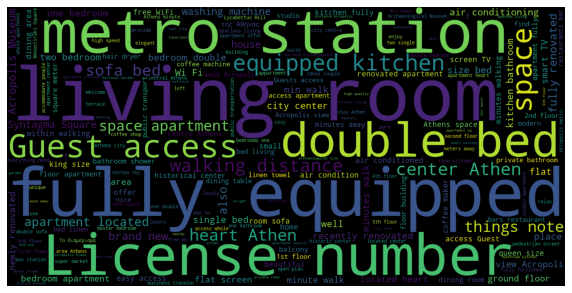

In [34]:
#lista de stopword
stop_words = set(stopwords.words('english'))
stop_words.update(["br"]) #Nosso problema tinham muitos 'br' soltos sem nenhum valor, dessa forma vamos retirá-los.

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1600, height=800).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

Dessa forma, conseguimos visualizar de forma mais simples as palavras mais escritas pelos anfitriões. Dentre eles, fica destacada a presença de living room(sala de estar, em português), metro station(estação de metrô, em português) e double bed(duas camas, em português).

###Visualização da Wordcloud na forma do Partenon, um dos famosos Monumentos gregos!

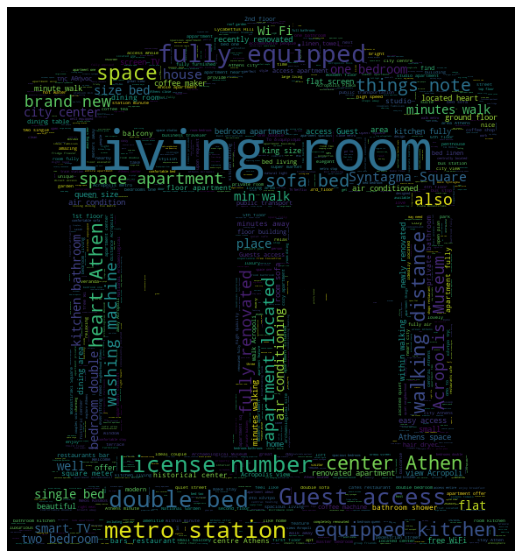

In [35]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("/content/Final.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

# Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em ΡΗΓΙΛΛΗΣ há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Além disso, conseguimos visualizar a Wordcloud das palavras mais escritas pelos anfitriões e notamos que o imóvel estar perto de uma estação de metrô e/ou ter duas camas e/ou ter sala de estar ser bem comum entre os imóveis  

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com mais atributos disponíveis.